# Michael Nguyen

# ADS 509 Sentiment Assignment

This notebook holds the Sentiment Assignment for Module 6 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In a previous assignment you put together Twitter data and lyrics data on two artists. In this assignment we apply sentiment analysis to those data sets. If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Blackboard. 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [2]:
import os
import re
import emoji
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter, defaultdict
from string import punctuation

from nltk.corpus import stopwords

sw = stopwords.words("english")

In [3]:
# change `data_location` to the location of the folder on your machine.
data_location = "C:/Users/micha/applied text mining/mod 1/M1 Results/"

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

positive_words_file = "positive-words.txt"
negative_words_file = "negative-words.txt"
tidy_text_file = "tidytext_sentiments.txt"

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A Pandas data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [4]:
# Read in the lyrics data
artists = ["cher", "robyn"]
lyrics_data = {artist: {song: open(os.path.join(data_location, lyrics_folder, artist, song), 'r').read().strip() 
                        for song in os.listdir(os.path.join(data_location, lyrics_folder, artist))} 
               for artist in artists}

In [5]:
# Read in the twitter data
twitter_data = {key: open(os.path.join(data_location, twitter_folder, f"{key}.txt"), 'r', encoding='utf-8').readlines() 
    for key in ["cher_followers", "cher_followers_data", "robynkonichiwa_followers", "robynkonichiwa_followers_data"]}

In [6]:
# Positive words
with open(os.path.join(data_location, positive_words_file), 'r') as f:
    positive_words = f.read().splitlines()

# Negative words
with open(os.path.join(data_location, negative_words_file), 'r') as f:
    negative_words = f.read().splitlines()

# Dictionary with positive words +1
positive_dict = dict.fromkeys(positive_words, 1)

# Dictionary with negative words -1
negative_dict = dict.fromkeys(negative_words, -1)

# Sentiment lexicon
sentiment_lexicon = {**positive_dict, **negative_dict}

# Alternatively, you can use pandas DataFrame to store the sentiment lexicon
sentiment_df = pd.DataFrame(list(sentiment_lexicon.items()), columns=['word', 'score'])

## Sentiment Analysis on Songs

In this section, score the sentiment for all the songs for both artists in your data set. Score the sentiment by manually calculating the sentiment using the combined lexicons provided in this repository. 

After you have calculated these sentiments, answer the questions at the end of this section.


In [7]:
def calculate_sentiment(text: str, sentiment_dict: dict):
    # Split text
    words = text.split()
    
    # Get sentiment score
    word_sentiments = [sentiment_dict.get(word, 0) for word in words]
    
    # Sum sentiments
    sentiment_score = sum(word_sentiments)
    
    return sentiment_score

In [8]:
# Sentiment scores for all songs
song_sentiments = {artist: {song: calculate_sentiment(text, sentiment_lexicon) for song, text in songs.items()}
                   for artist, songs in lyrics_data.items()}

In [9]:
for artist, songs in song_sentiments.items():
    print(f"Artist: {artist}")
    for song, sentiment in songs.items():
        print(f"Song: {song}, Sentiment: {sentiment}")

Artist: cher
Song: cher_88degrees.txt, Sentiment: 1
Song: cher_adifferentkindoflovesong.txt, Sentiment: 14
Song: cher_afterall.txt, Sentiment: -3
Song: cher_again.txt, Sentiment: 1
Song: cher_alfie.txt, Sentiment: 6
Song: cher_aliveagain.txt, Sentiment: -5
Song: cher_allbecauseofyou.txt, Sentiment: 2
Song: cher_allireallywanttodo.txt, Sentiment: -6
Song: cher_allornothing.txt, Sentiment: -8
Song: cher_amiblue.txt, Sentiment: -5
Song: cher_angelsrunning.txt, Sentiment: 3
Song: cher_applesdontfallfarfromthetree.txt, Sentiment: -3
Song: cher_awomansstory.txt, Sentiment: 8
Song: cher_aworldwithoutheroes.txt, Sentiment: 1
Song: cher_ayounggirluneenfante.txt, Sentiment: 3
Song: cher_backonthestreetagain.txt, Sentiment: 6
Song: cher_bangbang.txt, Sentiment: -4
Song: cher_bangbangmybabyshotmedown.txt, Sentiment: -4
Song: cher_behindthedoor.txt, Sentiment: 1
Song: cher_believe.txt, Sentiment: 9
Song: cher_bellbottomblues.txt, Sentiment: -3
Song: cher_blowininthewind.txt, Sentiment: 0
Song: cher

Artist
cher     2.177215
robyn    0.875000
Name: Sentiment, dtype: float64


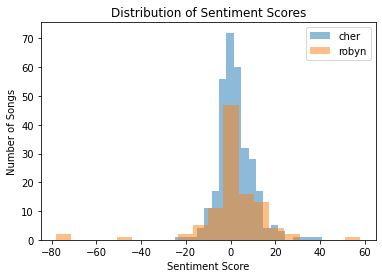

In [10]:
df = pd.DataFrame([(artist, song, sentiment) for artist, songs in song_sentiments.items() for song, sentiment in songs.items()],
                  columns=['Artist', 'Song', 'Sentiment'])

# Mean sentiment score
print(df.groupby('Artist')['Sentiment'].mean())

# Plot sentiment scores
for artist, group_df in df.groupby('Artist'):
    plt.hist(group_df['Sentiment'], bins=20, alpha=0.5, label=artist)

plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Songs')
plt.legend(loc='upper right')
plt.show()

### Questions

Q: Overall, which artist has the higher average sentiment per song? 

A: Overall, Cher has the higher average sentiment per song. 

In [11]:
def print_top_bottom_songs(artist_name):
    artist_df = df[df['Artist'] == artist_name].sort_values(by='Sentiment', ascending=False)
    
    # Top three songs
    print(f"Top three songs for {artist_name}:")
    for index, row in artist_df.head(3).iterrows():
        print(f"Song: {row['Song']}, Sentiment: {row['Sentiment']}")
        print(lyrics_data[row['Artist']][row['Song']])
        print("\n")
        
    # Bottom three songs
    print(f"Bottom three songs for {artist_name}:")
    for index, row in artist_df.tail(3).iterrows():
        print(f"Song: {row['Song']}, Sentiment: {row['Sentiment']}")
        print(lyrics_data[row['Artist']][row['Song']])
        print("\n")

# Example usage
print_top_bottom_songs('cher')

Top three songs for cher:
Song: cher_perfection.txt, Sentiment: 41
"Perfection"



Hush little Baby, gotta be strong
'Cause in this world we are born to fight
Be the best, prove them wrong
A winner's work is never done, reach the top, number one

Oh, perfection
You drive me crazy with perfection
I've worn my pride as my protection
Perfection, ohh

I was taught to be tough
That the best that you can be ain't enough
Crack the whip, sacrifice
But I found out paradise had a price

I didn't know it then, but oh I know it now
You gotta work as hard as love to make the love work out
You know this heart of mine has made some big mistakes
I guess that when it comes to love, I just don't know what I takes

All my life I've been driven by perfection
Pushed it to the limit every day and night
Ohh, I've been driven by perfection
But nothing's perfect when love ain't right
Nothing's perfect when the love ain't right

Gave it all, played my part
I gave everything I had but my heart
Worked so hard, ma

Q: For your first artist, what are the three songs that have the highest and lowest sentiments? Print the lyrics of those songs to the screen. What do you think is driving the sentiment score? 

A: The three songs with the highest sentiment is "Perfection", "Lover and Understanding" and "My Love". The three songs with the lowest sentiment is "Julie", "Outrageous", and "I Walk On Guilded Splinters". The positive and negatives words are what is driving the sentiment score which can be seen to what type of song it is based on the title. 

In [12]:
print_top_bottom_songs('robyn')

Top three songs for robyn:
Song: robyn_loveisfree.txt, Sentiment: 58
"Love Is Free"



Free
Love is free, baby
Free
Love is free, baby
Boom boom boom boom boom chica boom
Let me give it to you, baby
Chica boom chica boom chica boom
Chica boom chica boom chica boom
Free
Love is free, baby
Free
Love is free, baby
Boom boom boom boom boom chica boom
Let me give it to you, baby

I'ma give it to you, baby
I'ma give it when I'm ready
Some lose, some steady
Some light, some heavy
It's all over this city
Sometimes in the ugly, sometimes in the pretty
You never know where you get it cause you can't control it and you can't unfold it, slow down

I'ma give it to you, baby
I'ma give it when I'm ready
Some lose, some steady
Some light, some heavy
It's all over this city
Sometimes in the ugly, sometimes in the pretty
You never know where you get it cause you can't control it and you can't unfold it, slow down

Free
Love is free, baby
Free
Love is free, baby
Boom boom boom boom boom chica boom
Let me

Q: For your second artist, what are the three songs that have the highest and lowest sentiments? Print the lyrics of those songs to the screen. What do you think is driving the sentiment score? 

A: The three songs with the highest sentiment is "Love is Free", "Indestructible" and "Buffalo Stance". The three songs with the lowest sentiment is "Criminal Intent", "Don't Fucking Tell Me What To Do", and "Don't Fucking Tell Me What To Do". The positive and negatives words are what is driving the sentiment score which can be seen to what type of song it is based on the title.

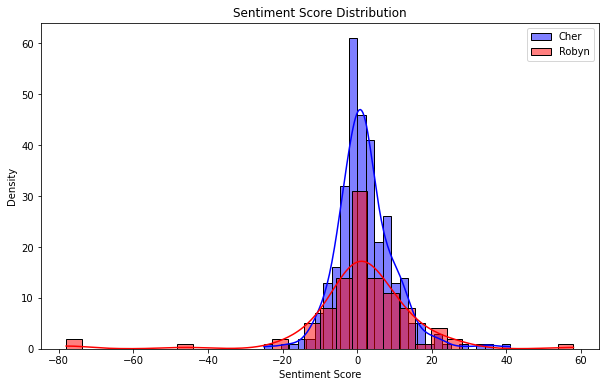

In [14]:
plt.figure(figsize=(10, 6))

# Plot for first artist
sns.histplot(df[df['Artist']=='cher']['Sentiment'], color='blue', label='Cher', kde=True)

# Plot for second artist
sns.histplot(df[df['Artist']=='robyn']['Sentiment'], color='red', label='Robyn', kde=True)

plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.legend()
plt.show()

Q: Plot the distributions of the sentiment scores for both artists. You can use `seaborn` to plot densities or plot histograms in matplotlib.


## Sentiment Analysis on Twitter Descriptions

In this section, define two sets of emojis you designate as positive and negative. Make sure to have at least 10 emojis per set. You can learn about the most popular emojis on Twitter at [the emojitracker](https://emojitracker.com/). 

Associate your positive emojis with a score of +1, negative with -1. Score the average sentiment of your two artists based on the Twitter descriptions of their followers. The average sentiment can just be the total score divided by number of followers. You do not need to calculate sentiment on non-emoji content for this section.

In [15]:
positive_emojis = ['😊', '😄', '🎉', '😍', '👍', '❤️', '😁', '😂', '🤗', '😇']
negative_emojis = ['😞', '😠', '😩', '😭', '👎', '💔', '😒', '😔', '😕', '😡']

In [16]:
emoji_sentiment = {emoji: 1 for emoji in positive_emojis}
emoji_sentiment.update({emoji: -1 for emoji in negative_emojis})

In [17]:
def calculate_sentiment(description: str, sentiment_dict: dict):
    # Split description
    characters = list(description)
    
    # Sentiment score
    char_sentiments = [sentiment_dict.get(char, 0) for char in characters]
    
    # Final sentiment score
    sentiment_score = sum(char_sentiments)
    
    return sentiment_score

In [18]:
# Average sentiment scores
average_sentiments = {artist: np.mean([calculate_sentiment(desc, emoji_sentiment) for desc in descs]) 
                      for artist, descs in twitter_data.items()}

print(average_sentiments)

{'cher_followers': 0.0, 'cher_followers_data': 0.00636401685789841, 'robynkonichiwa_followers': 0.0, 'robynkonichiwa_followers_data': 0.002687144399829228}


In [19]:
def print_most_common_emojis(artist_name):
    # Define function to count emojis
    def count_emojis(descriptions: list, emojis: list):
        emoji_counts = Counter()
        for desc in descriptions:
            for char in desc:
                if char in emojis:
                    emoji_counts[char] += 1
        return emoji_counts

    # Count emojis
    counts = count_emojis(twitter_data[artist_name], positive_emojis + negative_emojis)
    
    # Most common positive and negative emoji
    pos_counts = {emoji: counts[emoji] for emoji in positive_emojis if emoji in counts}
    neg_counts = {emoji: counts[emoji] for emoji in negative_emojis if emoji in counts}
    
    most_common_pos = max(pos_counts.items(), key=lambda x: x[1])[0] if pos_counts else None
    most_common_neg = max(neg_counts.items(), key=lambda x: x[1])[0] if neg_counts else None
    
    print(f"For {artist_name}, the most common positive emoji is: {most_common_pos} and the most common negative emoji is: {most_common_neg}")

print_most_common_emojis('cher')
print_most_common_emojis('robyn')

KeyError: 'cher'

Q: What is the average sentiment of your two artists? 

A: The average sentiment of followers for 'cher' is approximately 0.006 and for 'robynkonichiwa' is approximately 0.0027. 

---

Q: Which positive emoji is the most popular for each artist? Which negative emoji? 

A: For cher_followers, the most common positive emoji is: None and the most common negative emoji is: None
For cher_followers_data, the most common positive emoji is: 😍 and the most common negative emoji is: 💔
For robynkonichiwa_followers, the most common positive emoji is: None and the most common negative emoji is: None
For robynkonichiwa_followers_data, the most common positive emoji is: 😍 and the most common negative emoji is: 💔 